# Convert PNG to JPEG

I need to convert PNG to JPEG because the EyePACS dataset is in JPEG format, meanwhile APTOS in PNG format. I will blend this dataset with the EyePACS so that I have a balance dataset

In [1]:
!dir "D:/Datasets/thesis_dr/aptos2019/train_images_300/"

 Volume in drive D is Storage space
 Volume Serial Number is 3C35-EA61

 Directory of D:\Datasets\thesis_dr\aptos2019\train_images_300

01/15/2021  09:59 PM    <DIR>          .
01/15/2021  09:59 PM    <DIR>          ..
01/07/2021  08:46 PM    <DIR>          rescaled_300_crop_clahe_g
01/15/2021  10:23 PM    15,351,167,450 train_images_300.zip
12/11/2020  01:07 AM    <DIR>          train_images_rescaled_300
12/06/2020  07:20 AM    <DIR>          train_images_rescaled_300_btgraham
12/11/2020  01:07 AM    <DIR>          train_images_rescaled_300_crop
12/19/2020  11:57 AM    <DIR>          train_images_rescaled_300_crop_clahe_b
12/19/2020  11:57 AM    <DIR>          train_images_rescaled_300_crop_clahe_g
12/19/2020  11:57 AM    <DIR>          train_images_rescaled_300_crop_clahe_r
12/19/2020  11:57 AM    <DIR>          train_images_rescaled_300_crop_clahe_rgb
12/11/2020  01:07 AM    <DIR>          train_images_rescaled_300_enhanced_green
12/11/2020  01:07 AM    <DIR>          train_images_r

In [2]:
import cv2
import fnmatch
import os
from matplotlib import pyplot as plt

In [3]:
dir_src = "D:/Datasets/thesis_dr/aptos2019/train_images_300/train_images_rescaled_300/"
dir_dst = "D:/Datasets/thesis_dr/aptos2019/train_images_300/train_images_rescaled_300_jpeg_72/"

In [4]:
if os.path.isdir(dir_dst) == False:
    os.mkdir(dir_dst)

In [5]:
fnames = fnmatch.filter(os.listdir(dir_src), "*.png")
fnames[:3]

['000c1434d8d7.png', '001639a390f0.png', '0024cdab0c1e.png']

In [6]:
fnames[1].split(".")[0]

'001639a390f0'

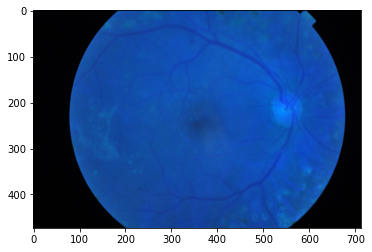

In [7]:
img = cv2.imread(os.path.join(dir_src, fnames[1]))
plt.imshow(img)

In [8]:
save_name = fnames[1].split(".")[0]
cv2.imwrite(save_name + ".jpeg", img, [int(cv2.IMWRITE_JPEG_QUALITY), 72])

True

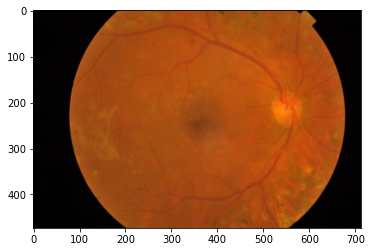

In [9]:
img = cv2.imread(save_name + ".jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Apply to all dataset

In [10]:
counter = 0
list_error = list()

for f in fnames:
    # check how much already processed
    counter += 1
    if counter % 250 == 0:
        print("image processed: ", counter)

    try:
        img = cv2.imread(os.path.join(dir_src, f))
        save_name = f.split(".")[0]
        cv2.imwrite(os.path.join(dir_dst, save_name + ".jpeg"), img,
                    [int(cv2.IMWRITE_JPEG_QUALITY), 72])
    except:
        list_error.append(f)

image processed:  250
image processed:  500
image processed:  750
image processed:  1000
image processed:  1250
image processed:  1500
image processed:  1750
image processed:  2000
image processed:  2250
image processed:  2500
image processed:  2750
image processed:  3000
image processed:  3250
image processed:  3500


In [11]:
list_error

[]